In [28]:


import numpy as np
import matplotlib.pyplot as plt
import os
import json
import random



################# PARAMETERS TO CHANGE ####################
dataset_folder = '../dataset/dungeon2/'
verbose = True



#total number of puzzles (meta samples)
dataset_size = 3

#number of training boards and testing boards
meta_trn_size_min = 2
meta_trn_size_max = 6
meta_tst_size     = 1




In [29]:

from genDSL_helpers import visualize_board
from dungeon_generation_script import generate_09c534e7



PUZZLE #1


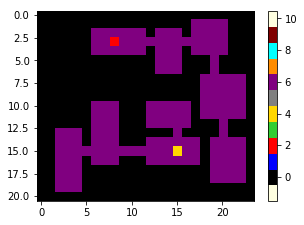

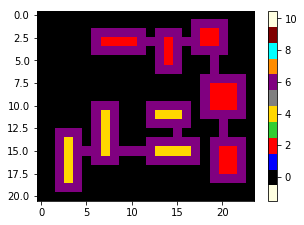

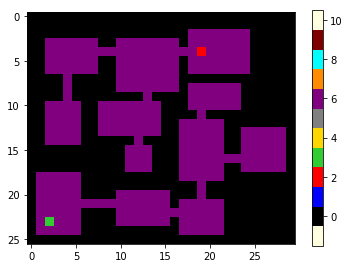

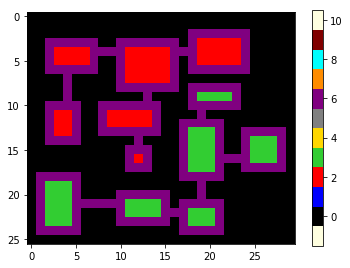

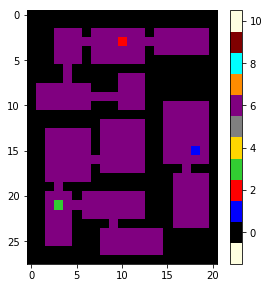

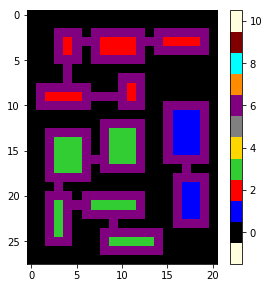

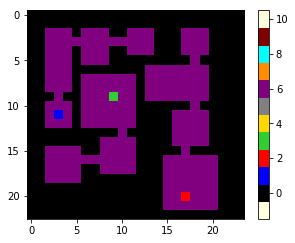

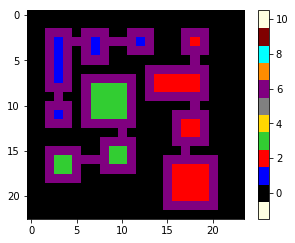



PUZZLE #2


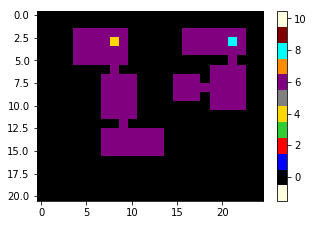

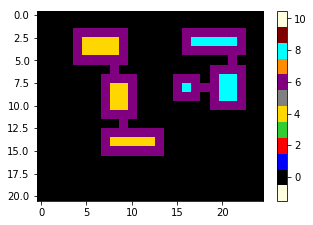

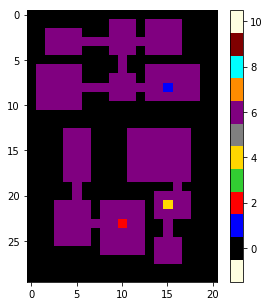

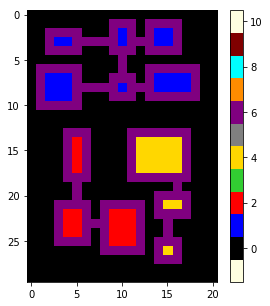

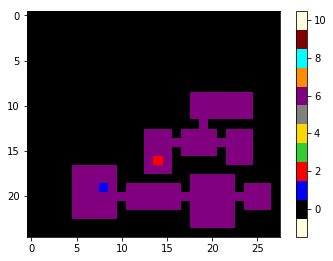

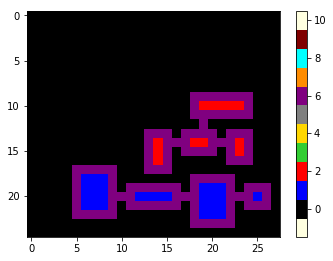

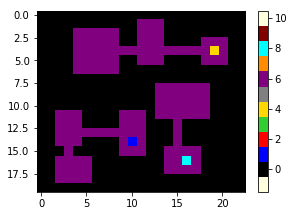

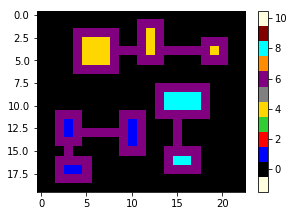

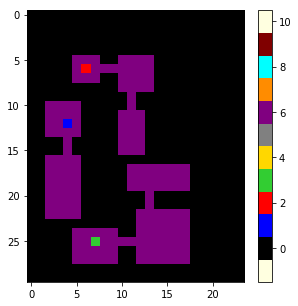

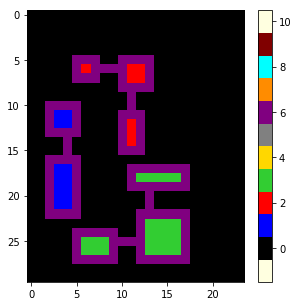

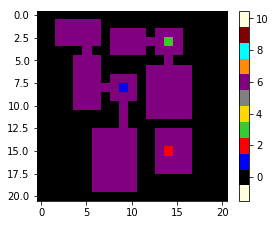

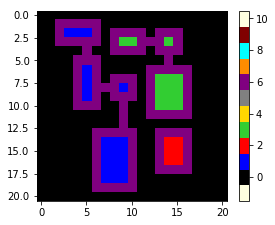

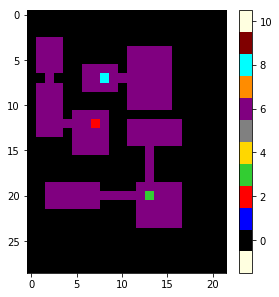

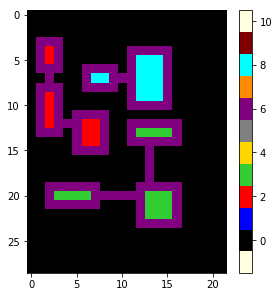



PUZZLE #3


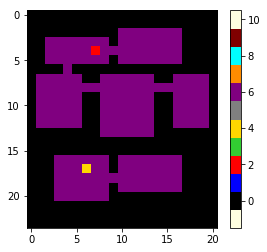

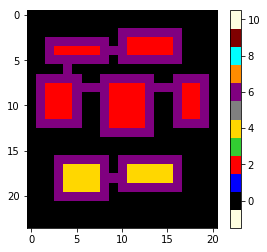

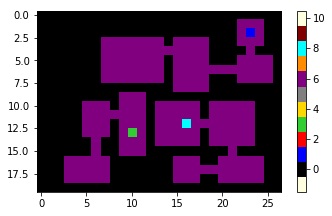

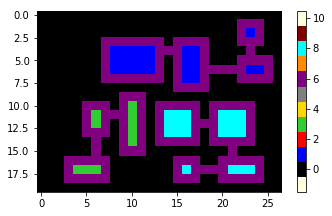

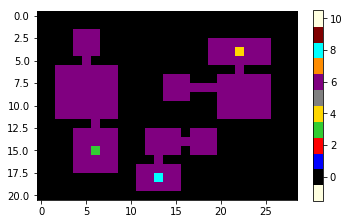

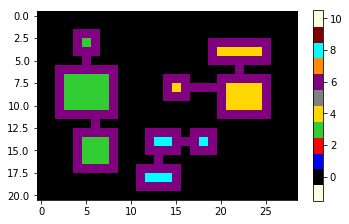

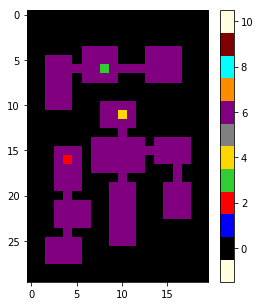

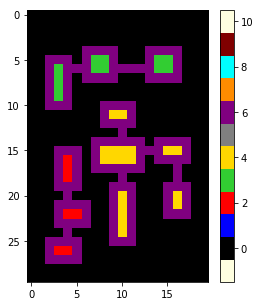

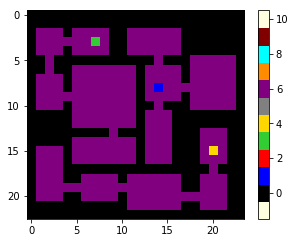

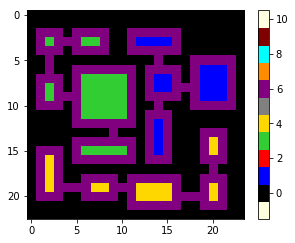

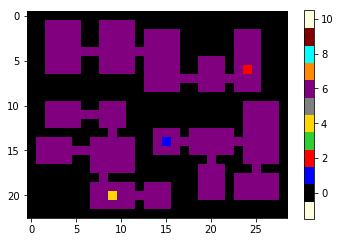

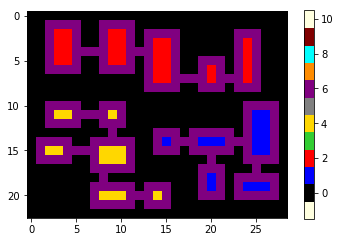

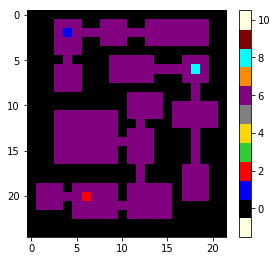

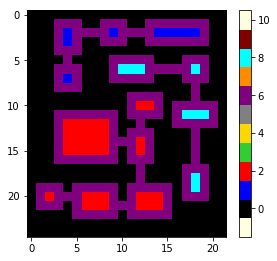



dataset generated


In [31]:
#adapted from Parapraxis dataset generation code

def gen_item_and_plot(plot = True):
    inp_board,out_board = generate_09c534e7()
    if plot:
        visualize_board(inp_board)
        visualize_board(out_board)
    return inp_board,out_board

def gen_train_items_and_plot(meta_trn_size = 1, plot = True):
    inp_out_pairs = []
    for i in range(meta_trn_size):
        inp_out_pairs.append(gen_item_and_plot(plot))
    return inp_out_pairs







for n in range(dataset_size):
    if verbose:
        print("PUZZLE #"+str(n+1))
    
    train_pairs=gen_train_items_and_plot(np.random.randint(meta_trn_size_min,meta_trn_size_max+1),  verbose)
    test_pairs=gen_train_items_and_plot(meta_tst_size, verbose)

    json_obj = {}
    json_obj['train'] = []
    json_obj['test'] = []
    # train
    for i in range(len(train_pairs)):
        a = {
            'input': train_pairs[i][0].tolist(),
            'output': train_pairs[i][1].tolist()
        }
        json_obj['train'].append(a)

    a = {'input': test_pairs[0][0].tolist(),
        'output': test_pairs[0][1].tolist()    }
    json_obj['test'].append(a)


    # verify folder exists ./dungeon_dataset/
    if not os.path.exists(dataset_folder):
        os.makedirs(dataset_folder)
    #make a new filename that is 8 characters long and represents a random hex number
    # characters betwee 0-9 and a-f
    string = '0123456789abcdef'
    filename = ''.join(random.choice(string) for i in range(8)) + '.json'
    # write the json object to a file
    with open(f"{dataset_folder}{filename}", 'w') as outfile:
        json.dump(json_obj, outfile)
    
    if verbose:
        print()
        print()

print('dataset generated')